In [ ]:
# This is the optimal portfolio. The code works and runs well, but we need to use a clean dataframe for this to work CORRECTLY.

# In this code, as of now, we used "working" as our dataframe... however, we noticed that the bitcoin information was flawed. In order to put this on dashboard, we need to clean up the dataframe.

# you can find the dataframe "working" or any other of its kind on Jorge's .ipynb

# dataframes have been pushed to a csv (fang_sum for the total price of all fang stocks daily in the clean data directory) ("working" is a csv in the raw_csv directory named "daily_prices_all_ugly")

# the goal is to match the Bitcoin prices to the Fang Sum in a way that makes since (ie Bitcoin should be around 12 or 13k instead of 9)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
filepath = ("../data/csv_files/CLEAN_CSV_Project.csv")
working = pd.read_csv(filepath)
working = working.set_index("Date")

In [31]:
assets_project = ["Gold", "sp500", "VNQ", "BITCOIN", "FAANG"]

In [32]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

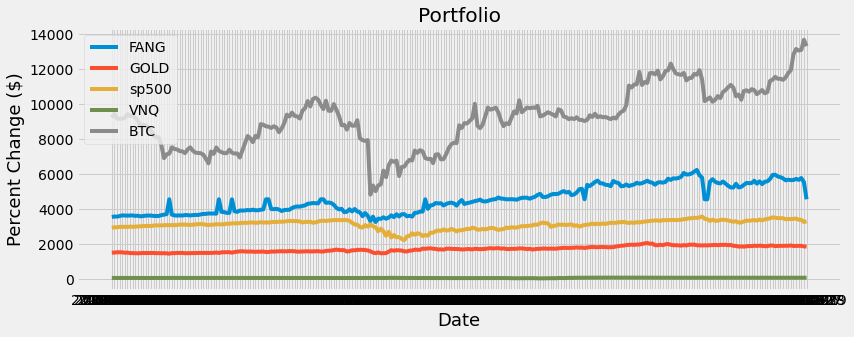

In [33]:
title = "Portfolio"
# created using the daily prices of all assets above
working = working 
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in working.columns.values:
  plt.plot( working[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Percent Change ($)',fontsize=18)
plt.legend(working.columns.values, loc='upper left')
plt.show()

In [34]:
returns = working.pct_change()

In [35]:
cov_matrix_annual = working.cov() * 252
cov_matrix_annual

,FANG,GOLD,sp500,VNQ,BTC
FANG,1.556129e+08,2.965021e+07,2.900055e+07,1.031519e+06,2.718527e+08
GOLD,2.965021e+07,6.776496e+06,4.258897e+06,2.026336e+05,5.263896e+07
sp500,2.900055e+07,4.258897e+06,1.638756e+07,2.886518e+05,7.480399e+07
VNQ,1.031519e+06,2.026336e+05,2.886518e+05,1.987938e+04,1.860034e+06
BTC,2.718527e+08,5.263896e+07,7.480399e+07,1.860034e+06,7.254176e+08


In [36]:
#Portfolio Vaariance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

73415632.70533927

In [37]:
#Volatility(Standard Deviation)
port_volatility = np.sqrt(port_variance)
port_volatility 

8568.292286409192

In [38]:
#Annual Return
portfolioSimpleAnnualReturn = np.sum(working.mean()*weights) * 252
portfolioSimpleAnnualReturn

940984.2110561798

In [39]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 94098421.0%
Annual volatility/standard deviation/risk : 856829.0000000001%
Annual variance : 7341563270.999999%


In [40]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [41]:
mu = expected_returns.mean_historical_return(working)
S = risk_models.sample_cov(working)

In [42]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('FANG', 0.06922), ('GOLD', 0.60655), ('sp500', 0.17716), ('VNQ', 0.08665), ('BTC', 0.06042)])
Expected annual return: 20.9%
Annual volatility: 15.7%
Sharpe Ratio: 1.20


(0.20873574453372562, 0.15733030152119223, 1.1996147131790955)

In [43]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(working)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=150000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FANG': 2, 'GOLD': 48, 'sp500': 8, 'VNQ': 121, 'BTC': 1}
Funds remaining: $19.43
